<a href="https://colab.research.google.com/github/DimuthKarunarathna/Resume-Screening-System/blob/main/Resume_Screening_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import pandas as pd
import nltk
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# NLTK downloads
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Load CSV
df = pd.read_csv('/content/drive/MyDrive/Resume Screening System/UpdatedResumeDataSet.csv')

# View first 5 rows
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
#Cleaning Data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove links
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()  # Lowercase
    words = word_tokenize(text)
    words = [w for w in words if w.isalpha() and w not in stop_words]
    return ' '.join(words)

df['cleaned_resume'] = df['Resume'].apply(clean_text)
df[['Resume', 'cleaned_resume']].head()

,Resume,cleaned_resume
0,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Education Details \r\nMay 2013 to May 2017 B.E...,education details may may uitrgpv data scienti...
2,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [7]:

#  Convert text to numbers (TF-IDF)

tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(df['cleaned_resume']).toarray()

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['Category'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [9]:
#  Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


Accuracy: 0.9896373056994818

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      0.92      0.96        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       0.94      1.00      0.97        15
          16       1.00    

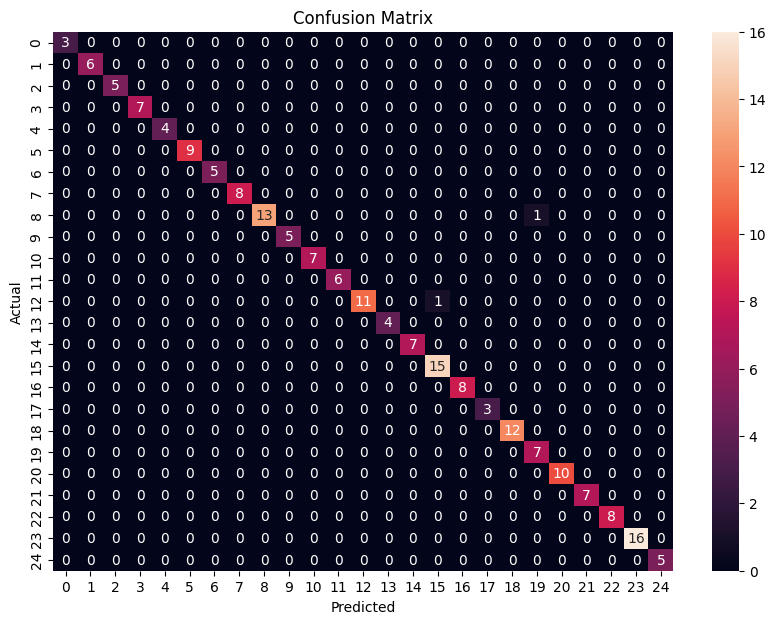

In [10]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [30]:
import joblib
# Save model
joblib.dump(model, "/content/drive/MyDrive/Resume Screening System/resume_classifier.pkl")

# Save TF-IDF or CountVectorizer
joblib.dump(tfidf, "/content/drive/MyDrive/Resume Screening System/vectorizer.pkl")

# Save  LabelEncoder
joblib.dump(le,"/content/drive/MyDrive/Resume Screening System/label_encoder.pkl")

['/content/drive/MyDrive/Resume Screening System/label_encoder.pkl']

In [24]:
# 1. Load the model and vectorizer
!pip install PyPDF2
import joblib
import PyPDF2 # or pdfminer.six

model = joblib.load("/content/drive/MyDrive/Resume Screening System/resume_classifier.pkl")
tfidf = joblib.load("/content/drive/MyDrive/Resume Screening System/vectorizer.pkl")
le = joblib.load("/content/drive/MyDrive/Resume Screening System/label_encoder.pkl")

# 2. Define a function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text += page.extract_text()
    return text

# 3. Define a function to clean text (use the same logic as in training)
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove links
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()  # Lowercase
    words = word_tokenize(text)
    words = [w for w in words if w.isalpha() and w not in stop_words]
    return ' '.join(words)

# 4. Load the PDF and process it
pdf_path = "/content/drive/MyDrive/Resume Screening System/Software_Engineer_ML_Testing_Resume.pdf"
resume_text = extract_text_from_pdf(pdf_path)
cleaned_resume_text = clean_text(resume_text)

# 5. Vectorize the cleaned text
vectorized_resume = tfidf.transform([cleaned_resume_text]) # Use transform, not fit_transform

# 6. Make a prediction
predicted_label = model.predict(vectorized_resume)

# 7. Decode the prediction (if you saved and loaded the LabelEncoder)
predicted_category = le.inverse_transform(predicted_label)
print("Predicted Category:", predicted_category[0])

# If you didn't save the LabelEncoder, you'll get a numerical prediction
print("Predicted Label (numerical):", predicted_label[0])

Predicted Category: Data Science
Predicted Label (numerical): 6


In [28]:
import streamlit as st
import joblib
import PyPDF2
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# NLTK downloads (run this once)
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')

# Load the saved model, vectorizer, and label encoder
try:
    model = joblib.load("/content/drive/MyDrive/Resume Screening System/resume_classifier.pkl")
    tfidf = joblib.load("/content/drive/MyDrive/Resume Screening System/vectorizer.pkl")
    le = joblib.load("/content/drive/MyDrive/Resume Screening System/label_encoder.pkl")
    stop_words = set(stopwords.words('english')) # Define stop_words here
except FileNotFoundError:
    st.error("Error: Model, vectorizer, or label encoder file not found. Make sure the paths are correct.")

# Define a function to extract text from PDF
def extract_text_from_pdf(pdf_file):
    text = ""
    try:
        reader = PyPDF2.PdfReader(pdf_file)
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text += page.extract_text()
    except Exception as e:
        st.error(f"Error extracting text from PDF: {e}")
        text = None
    return text

# Define a function to clean text (same logic as in training)
def clean_text(text):
    if text is None:
        return ""
    text = re.sub(r'<.*?>', '', text)  # Remove HTML
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove links
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()  # Lowercase
    words = word_tokenize(text)
    words = [w for w in words if w.isalpha() and w not in stop_words]
    return ' '.join(words)

# Streamlit App
st.title("Resume Category Predictor")

uploaded_file = st.file_uploader("Upload a PDF resume", type=["pdf"])

if uploaded_file is not None:
    st.write("Processing resume...")
    resume_text = extract_text_from_pdf(uploaded_file)

    if resume_text:
        cleaned_resume_text = clean_text(resume_text)

        if cleaned_resume_text:
            # Vectorize the cleaned text
            vectorized_resume = tfidf.transform([cleaned_resume_text])

            # Make a prediction
            predicted_label = model.predict(vectorized_resume)

            # Decode the prediction
            predicted_category = le.inverse_transform(predicted_label)

            st.success(f"Predicted Category: **{predicted_category[0]}**")
        else:
            st.warning("Could not clean text from the uploaded PDF.")
    else:
        st.warning("Could not extract text from the uploaded PDF.")

2025-05-22 02:10:09.106 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 02:10:09.107 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 02:10:09.109 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 02:10:09.110 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 02:10:09.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 02:10:09.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 02:10:09.113 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
